Fitting a model with 2482628 free scalar parameters with only 364940 data points will result in a degenerate solution.
C:\Users\HP\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


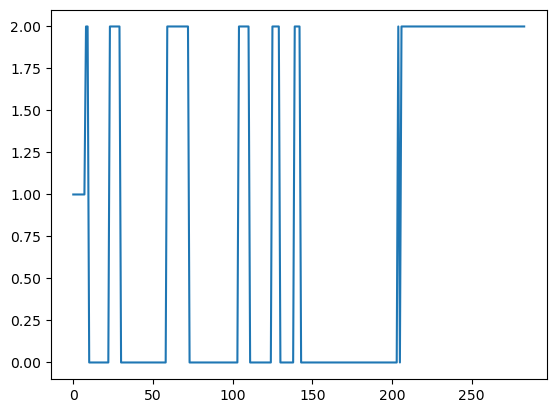

In [29]:
import numpy as np
from hmmlearn import hmm
import librosa
import matplotlib.pyplot as plt

speech_signal, sampling_rate = librosa.load(r"D:\Downloads\speech processing.mp3")

# Define parameters for STFT feature extraction
n_fft = 512  # Adjust according to signal length
hop_length = 256

# Ensure the length of the signal is compatible with the FFT window size
if len(speech_signal) < n_fft:
    raise ValueError("Signal length is shorter than the FFT window size.")

# Extract STFT features from overlapping windows
stft_features = []
for i in range(0, len(speech_signal) - n_fft, hop_length):
    frame = speech_signal[i:i+n_fft]
    stft = librosa.stft(frame, n_fft=n_fft)
    stft_magnitude, _ = librosa.magphase(stft)
    stft_log_magnitude = librosa.amplitude_to_db(stft_magnitude)
    flattened_features = stft_log_magnitude.flatten()
    stft_features.append(flattened_features)

# Convert to numpy array
X_train = np.array(stft_features)
y_train = np.zeros(X_train.shape[0], dtype=int)  # Assuming class 0 for all observations

# Define and train the HMM
num_states = 3  # Number of states in the HMM
model = hmm.GaussianHMM(n_components=num_states, covariance_type="full")
model.fit(X_train)

# Given a new speech signal (could be real data), extract STFT features
X_test = X_train  # For demonstration, reuse features of the training data

# Use Viterbi algorithm to find the most likely sequence of states
log_likelihood, state_sequence = model.decode(X_test)

print(state_sequence)
plt.plot(state_sequence)

# Classify the speech signal based on the obtained sequence of states
predicted_class = state_sequence[-1]  # Assuming each state corresponds to a class

In [33]:
print("Predicted class:", predicted_class)

Predicted class: 2


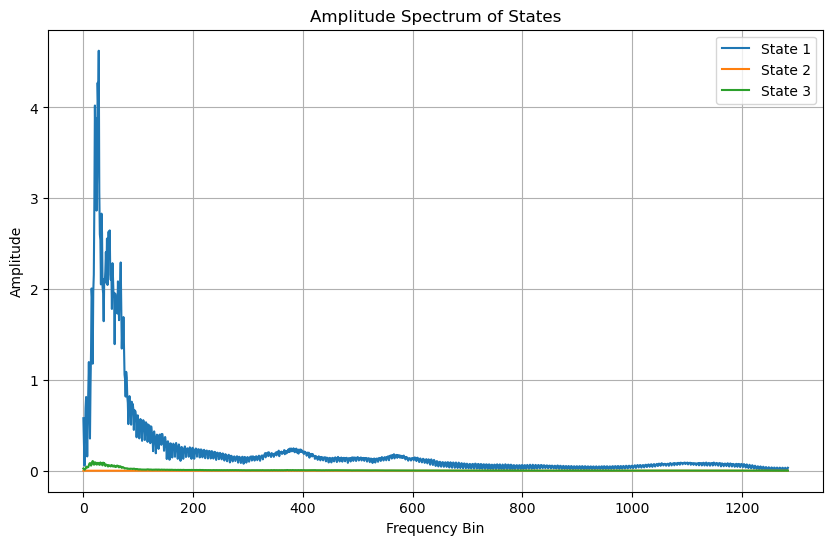

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Get the mean spectrum of each state
mean_spectra = model.means_

# Convert mean spectra from dB to amplitude
mean_spectra_amplitude = 10 ** (mean_spectra / 20)  # Convert dB to amplitude

# Compute amplitude spectrum of the original signal
original_spectrum = np.abs(np.fft.rfft(speech_signal))

# Plot the amplitude spectrum of each state and the original signal
plt.figure(figsize=(10, 6))

# Plot amplitude spectrum of each hidden state
for i, spectrum in enumerate(mean_spectra_amplitude):
    plt.plot(spectrum, label=f"State {i+1}")

plt.title('Amplitude Spectrum of States')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

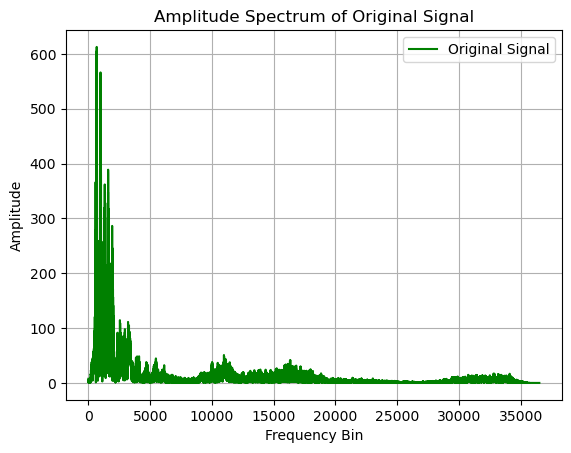

In [35]:
# Plot amplitude spectrum of the original signal
plt.plot(original_spectrum, label='Original Signal', linestyle='-', color='green')
plt.title('Amplitude Spectrum of Original Signal')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()